In [1]:
%pip install python-docx
%pip install openai
%pip install rank_bm25

  Using cached python_docx-1.1.2-py3-none-any.whl.metadata (2.0 kB)
Using cached python_docx-1.1.2-py3-none-any.whl (244 kB)
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [2]:
from dotenv import load_dotenv

load_dotenv()

True

### Word, Powerpoint 문서 기반 답변 결과 생성하기

##### 1. word 불러오기

In [4]:
from docx import Document

path = '../Assets/data/시스템장애대응.docx'

doc = Document(path)

doc_text = ''
for para in doc.paragraphs:
    print(para.text)
    doc_text += para.text



서버 장애가 발생했을 때는 빠르고 체계적인 대응이 필요하고, 팀 간의 효율적인 소통이 핵심이다.

사전 대비
✧ 시스템의 핵심 서비스를 지속적으로 모니터링하고, 임계값을 초과할 경우 즉각적으로 알림을 받을 수 있는 경보시스템을 설정한다. 
✧ 주기적으로 데이터베이스, 파일시스템, 설정등을 백업하고 복구 테스트를 수행한다.
✧ 장애 전파, 조치사항 및 고객과의 소통 상황을 공유할 수 있는 별도 대화방을 운영한다.
✧ 동일한 사례를 검색하여 매뉴얼대로 대응할 수 있도록 장애 게시판을 운영한다. (원인, 처리사항(관련자, 처리내용), 대응매뉴얼 첨부)

장애 전파
✧ 장애증상을 팀 내부 또는 관련 담당자들에게 즉시 통보한다.
✧ 장애에 대한 상태 업데이트를 정기적으로 제공하고 향후 조치 계획을 공유한다.

문제 파악 및 분석
✧ 장애가 발생한 시점부터 로그 및 기타 모니터링 도구를 통해 문제의 원인을 신속하게 파악한다.
✧ 장애가 어떤 종류인지 확인하여 긴급/일반으로 등급을 나누고 등급별 장애 처리 절차대로 진행한다.
- 긴급 : 서버다운, 하드웨어, 네트워크, 데이타베이스, 데이타 유실등의 긴급 장애의 건
- 일반 : 페이지 로딩, 메일 딜레이, 소프트웨어 오류등의 비교적 가벼운 장애의 건

긴급 대응 조치
장애를 인지한 담당자로부터 리포트를 전달 받는다.
	❍ 주체 
		운영팀, 영업팀등
	❍ 조치 
		서버 정보, 장애시간, 서버 담당자, 장애 범위, 장애 내용 요약, 유실 범위, 서버내 작업 내역 및 작업중 특이사항(작업 History 기재)

	2) 서버 점검을 진행한다.
	❍ 주체 
		엔지니어
	❍ 조치  
 		리포트를 확인하고 복구 방법을 검토한다.
		복구 방법을 관련 담당자들(영업팀, 개발팀등)에게 공유한다.

	3) 고객사에게 안내하고 협의를 한다.	
 주체 
		영업팀 선임자
 조치 
		복구 우선순위 및 방법을 안내한다.

	4) 고객 측과 협의된 복구 방법 및 우선순위를 관련 담당자들에게 공유한다.
 주체 
		엔지니어 선임자, 영업팀 선

In [5]:
len(doc_text)

2172

In [8]:
from openai import OpenAI

client = OpenAI()

prompt = f'주어진 문서를 기반으로 사용자의 질문에 답변해주세요.\n 문서: {doc_text} 질문: 서버 장애 발생시 대응하는 방법을 알려주세요.'

chat_completion = client.chat.completions.create(
    messages=[
        {
            "role": "user",
            "content": prompt,
        }
    ],
    model="gpt-4o-mini",
)
print(chat_completion.choices[0].message.content)

서버 장애 발생 시 대응 방법은 다음과 같습니다:

1. **사전 대비**:
   - 시스템의 핵심 서비스를 지속적으로 모니터링하고, 임계값 초과 시 즉각적으로 알림을 받을 수 있는 경보 시스템을 설정합니다.
   - 데이터베이스, 파일 시스템, 설정 등을 주기적으로 백업하고 복구 테스트를 수행합니다.
   - 장애 전파, 조치사항 및 고객과의 소통 상황을 공유하는 대화방을 운영합니다.
   - 동일한 사례를 검색하여 매뉴얼대로 대응할 수 있도록 장애 게시판을 운영합니다.

2. **장애 전파**:
   - 장애 증상을 팀 내부 또는 관련 담당자에게 즉시 통보합니다.
   - 상태 업데이트를 정기적으로 제공하고 향후 조치 계획을 공유합니다.

3. **문제 파악 및 분석**:
   - 로그 및 모니터링 도구를 통해 문제의 원인을 신속하게 파악합니다.
   - 장애 유형을 긴급/일반으로 구분하여 처리합니다. 긴급 장애(예: 서버 다운, 데이터 유실)와 일반 장애(예: 페이지 로딩, 소프트웨어 오류)으로 나누어 대처합니다.

4. **긴급 대응 조치**:
   - 장애 인지 담당자로부터 리포트를 받고, 서버 점검을 진행합니다.
   - 고객사에게 복구 방법 및 우선순위를 안내하고 협의합니다.
   - 담당자가 복구를 진행하고, 예상 복구 시간을 영업팀에 전달합니다.
   - 복구 진행 내용을 고객측에 안내합니다.

5. **일반 대응 조치**:
   - 최근의 서버/소프트웨어 변경사항을 점검합니다.
   - 하드웨어 자원(CPU, 메모리, 디스크 등)을 점검합니다.
   - 문제를 확인한 시점에서 해결 방안을 협의합니다.

6. **사후 조치 및 예방**:
   - 장애의 근본 원인을 분석하고 해결책을 도입합니다.
   - 장애 후 예방책을 마련하고 유사한 문제를 예방하기 위한 추가 조치를 취합니다.

7. **문서화**:
   - 발생한 장애와 대응 과정을 자세히 문서화하여 향후 대비하고, 지속적인 피드백을 통해 문서를 업데이트합니다.
   - 팀원들에게 교육 

##### 2. 질문과 관련있는 내용을 문서 찾아서 답변과 같이 반환하기

In [29]:
from docx import Document

def remove_tabs_from_docx(doc):
    for paragraph in doc.paragraphs:
        for run in paragraph.runs:
            run.text = run.text.replace('\t', '')
    return doc
  
path = '../Assets/data/시스템장애대응.docx'

doc = remove_tabs_from_docx(Document(path))

corpus = [para.text for para in doc.paragraphs]

In [30]:
from rank_bm25 import BM25Okapi
  
def tokenizer(sent):
  return sent.split(" ")

tokenized_corpus = [tokenizer(doc) for doc in corpus]

bm25 = BM25Okapi(tokenized_corpus)

In [31]:
query = "서버 장애 발생시 대응하는 방법을 알려주세요"
tokenized_query = tokenizer(query)
bm25.get_top_n(tokenized_query, corpus, n=5)

['서버 정보, 장애시간, 서버 담당자, 장애 범위, 장애 내용 요약, 유실 범위, 서버내 작업 내역 및 작업중 특이사항(작업 History 기재)',
 '2) 서버 점검을 진행한다.',
 '복구 우선순위 및 방법을 안내한다.',
 '복구 방법을 관련 담당자들(영업팀, 개발팀등)에게 공유한다.',
 ' 리포트를 확인하고 복구 방법을 검토한다.']

In [32]:

def doc_based_answer(query):
  def tokenizer(sent):
    return sent.split(" ")
  tokenized_query = tokenizer(query)
  related_p = bm25.get_top_n(tokenized_query, corpus, n=5)

  doc_format = ""
  for i, p in enumerate(related_p):
    doc_format += f"[{i}]: {p} \n"

  prompt = f'주어진 문서를 기반으로 사용자의 질문에 답변해줘.\n 문서: {doc_format} 질문: 서버 장애 발생시 대응하는 방법을 알려주세요'

  chat_completion = client.chat.completions.create(
      messages=[
          {
              "role": "user",
              "content": prompt,
          }
      ],
      model="gpt-4o-mini",
  )

  return chat_completion.choices[0].message.content + f"\n관련 문서: \n{doc_format}"

print(doc_based_answer('서버 장애 발생시 대응하는 방법을 알려주세요'))

서버 장애 발생 시 대응하는 방법은 다음과 같습니다:

1. **서버 정보를 확인합니다.** (장애시간, 서버 담당자, 장애 범위 등)
2. **장애 점검을 진행합니다.** (서버 점검)
3. **복구 우선순위 및 방법을 안내합니다.**
4. **복구 방법을 관련 담당자들과 공유합니다.** (영업팀, 개발팀 등)
5. **리포트를 확인하고 복구 방법을 검토합니다.**

이러한 단계를 통해 장애 상황을 체계적으로 관리하고 복구할 수 있습니다.
관련 문서: 
[0]: 서버 정보, 장애시간, 서버 담당자, 장애 범위, 장애 내용 요약, 유실 범위, 서버내 작업 내역 및 작업중 특이사항(작업 History 기재) 
[1]: 2) 서버 점검을 진행한다. 
[2]: 복구 우선순위 및 방법을 안내한다. 
[3]: 복구 방법을 관련 담당자들(영업팀, 개발팀등)에게 공유한다. 
[4]:  리포트를 확인하고 복구 방법을 검토한다. 



##### 3. 언어모델을 사용할 수 있도록 PPT 변환하기

In [33]:
%brew install poppler
%pip install pdf2image


Note: you may need to restart the kernel to use updated packages.


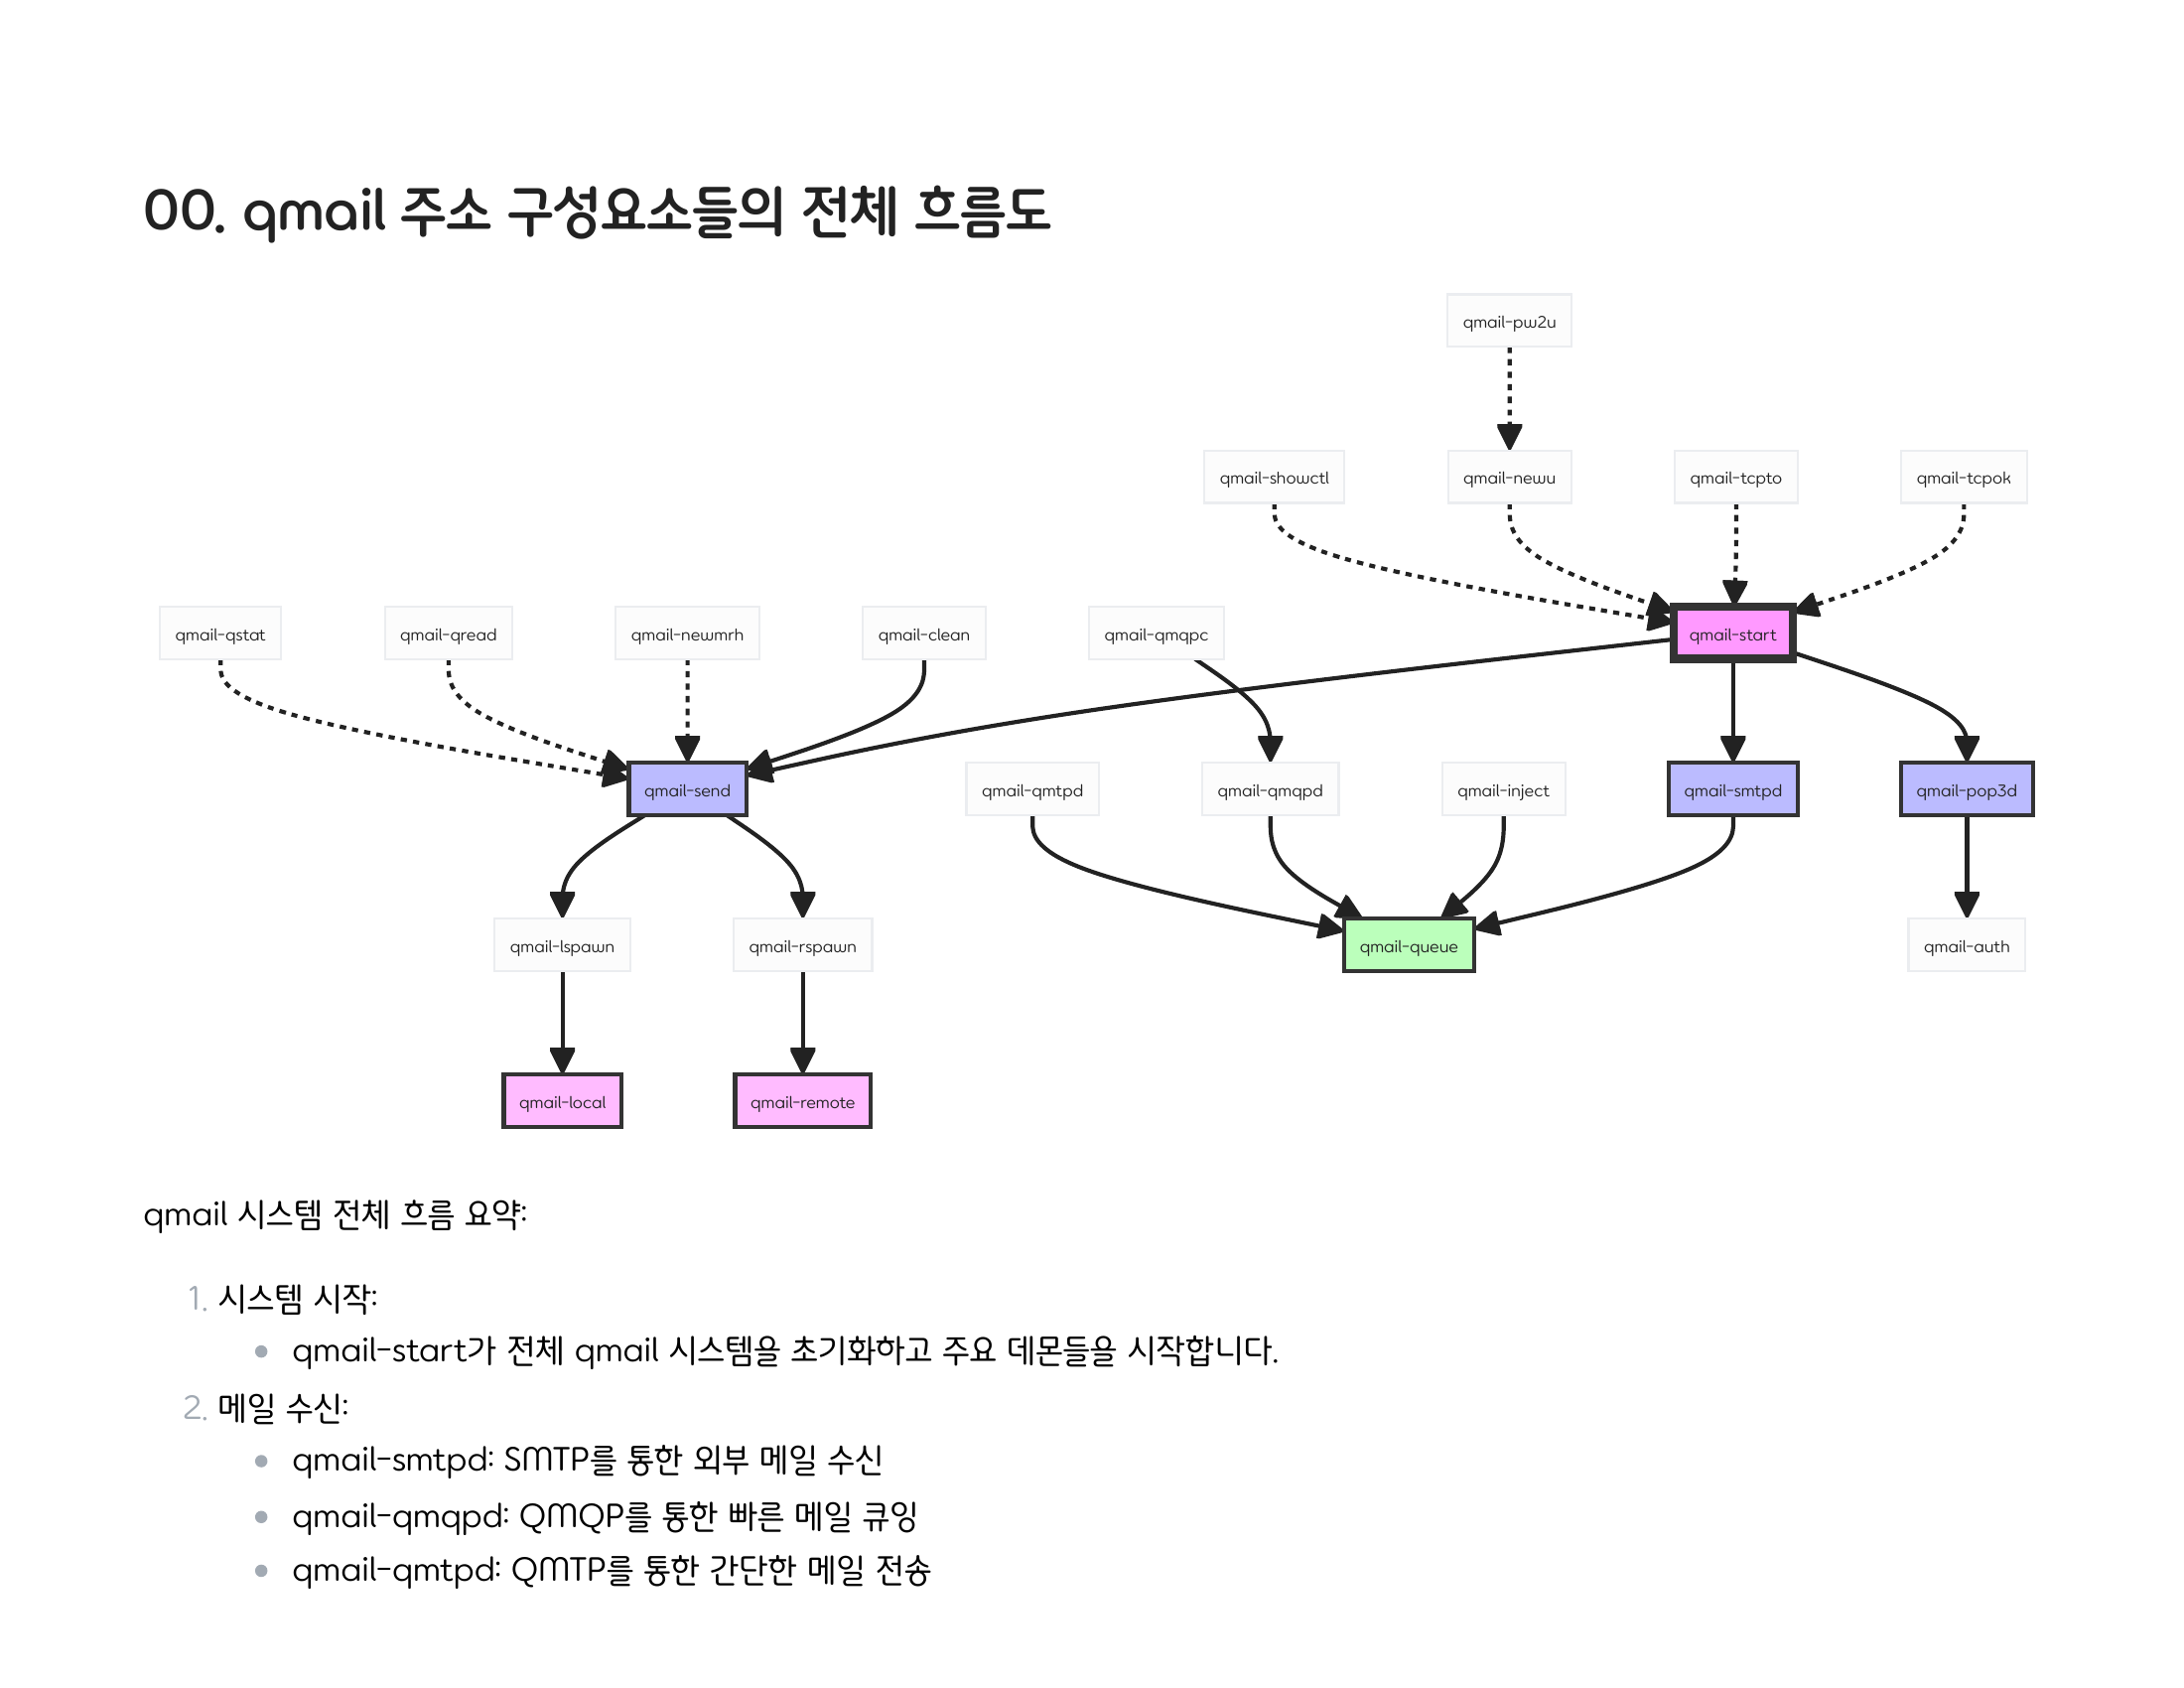

In [35]:
from pdf2image import convert_from_path
ppt_path = "../Assets/data/qmail 주소 구성요소들의 전체 흐름도.pdf"

pages = convert_from_path(ppt_path)

save_path = '../Assets/images'
for i, p in enumerate(pages):
  p.save(f'{save_path}/{i}', 'jpeg')
pages[0]

In [38]:

from openai import OpenAI
import base64


client = OpenAI()

def encode_image(image_path):
  with open(image_path, "rb") as image_file:
    return base64.b64encode(image_file.read()).decode('utf-8')

image_path = '../Assets/images/0'

base64_image = encode_image(image_path)

chat_completion = client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "해당 사진에 대한 설명을 써줘"},
                {
                    "type": "image_url",
                    "image_url": {
                      "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
    ]
)

print(chat_completion.choices[0].message.content)


이 사진은 qmail 시스템의 구성 요소와 흐름도를 나타내고 있습니다. qmail은 메일 전송에 관련된 다양한 프로세스와 컴포넌트로 이루어져 있으며, 각 요소의 역할과 상호작용을 보여줍니다.

1. **시스템 시작**: 
   - `qmail-start`가 전체 qmail 시스템을 초기화하며 주요 프로세스를 시작합니다.

2. **메일 수신**:
   - `qmail-smtpd`: SMTP를 통해 외부에서 메일을 수신합니다.
   - `qmail-qmpd`: QMQP를 통한 빠른 메일 큐잉을 처리합니다.
   - `qmail-qmtpd`: QMTPE를 통해 간단한 메일 전송 기능을 제공합니다.

흐름도는 이러한 요소들이 어떻게 연결되어 있는지를 시각적으로 표현하며, 각 요소 간의 데이터 흐름과 상호작용을 설명합니다.


##### PPT 기반 상담 봇 만들기

In [40]:
from openai import OpenAI
import base64


class PPT_chatbot:
  def __init__(self, slide_list):
    self.client = OpenAI()
    self.ppt_description = ""
    for slide_path in slide_list:
      base64_image = self.__encode_image__(slide_path)
      self.ppt_description += self.image_based_answer(base64_image)

  def __encode_image__(self, image_path):
    with open(image_path, "rb") as image_file:
      return base64.b64encode(image_file.read()).decode('utf-8')

  def image_based_answer(self, base64_image):
    chat_completion = self.client.chat.completions.create(
    model="gpt-4o-mini",
    messages=[
        {
            "role": "user",
            "content": [
                {"type": "text", "text": "해당 사진에 대한 자세한 설명을 써줘"},
                {
                    "type": "image_url",
                    "image_url": {
                      "url": f"data:image/jpeg;base64,{base64_image}"
                    }
                }
            ]
        }
      ]
    )
    return chat_completion.choices[0].message.content

  def answer(self, query):
    system_prompt = f"너는 주어진 설명을 바탕으로 답변해 주는 인공지능 챗봇이야. 사용자의 질문에 대해 친절하게 답변해줘. \n설명: {self.ppt_description}"
    chat_completion = self.client.chat.completions.create(
        messages=[
            {
                "role": "system",
                "content": system_prompt
            },
            {
                "role": "user",
                "content": query,
            }
        ],
        model="gpt-4o-mini",
    )
    return chat_completion.choices[0].message.content


In [41]:
slide_list = [f'../Assets/images/{i}' for i in range(2)]
chat_bot = PPT_chatbot(slide_list)

In [42]:
chat_bot.ppt_description

'이 이미지는 qmail 시스템의 전체 흐름도를 나타내고 있습니다. qmail은 이메일 서버 소프트웨어로, 다양한 구성 요소들이 서로 연결되어 있습니다. \n\n주요 내용:\n\n1. **시스템 시작**:\n   - `qmail-start`: qmail 시스템의 초기화와 주요 프로세스를 시작합니다.\n\n2. **메일 수신**:\n   - `qmail-smtpd`: SMTP를 통해 외부 메일을 수신합니다.\n   - `qmail-qmaild`: QMQP를 통해 빠른 메일 규정을 처리합니다.\n   - `qmail-qmtpd`: QMQP를 통한 간단한 메일 전송을 담당합니다.\n\n각 구성 요소는 다양한 기능을 수행하며, 메일 전송 및 수신 과정을 효율적으로 관리합니다. 흐름도는 이러한 요소들 간의 연결과 흐름을 시각적으로 설명하고 있습니다.이 사진은 qmail 시스템의 주요 구성 요소와 그 기능에 대한 설명을 담고 있습니다. qmail은 이메일 처리 및 배달을 위한 소프트웨어로, 여러 구성 요소가 협력하여 전체 이메일 시스템을 형성합니다.\n\n1. **메일 주입**: qmail-inject를 통해 로컬에서 이메일을 주입할 수 있습니다.\n  \n2. **메일 큐**: qmail-queue를 사용하여 모든 수신 이메일을 저장합니다.\n\n3. **메일 처리 및 배달**:\n   - qmail-send: 큐에서 이메일을 가져와 처리합니다.\n   - qmail-local: 로컬 사용자에게 이메일을 배달합니다.\n   - qmail-remote: 외부 메일 서버에 이메일을 배달합니다.\n\n4. **사용자 액세스**: qmail-pop3d를 통해 POP3 프로토콜로 이메일을 접근할 수 있습니다.\n\n5. **유지 관리 및 모니터링**:\n   - qmail-clean: 큐 정리.\n   - qmail-tcpok/qmail-tcpto: TCP 연결 관리.\n   - qmail-neumrh: 메시지 수신 기록 관리.\n\n6. **사용자 및 설정 관리**: qmai

In [43]:
query_list = ["qmail-smtpd의 역활은 뭔가요?", "qmail-smtpd는 어떤 데몬을 trigger 하나요?"]

for q in query_list:
  print(f"Q: {q}")
  print(f"A: {chat_bot.answer(q)}")
  print("\n===============================\n")

Q: qmail-smtpd의 역활은 뭔가요?
A: `qmail-smtpd`는 qmail 시스템에서 SMTP 프로토콜을 통해 외부 메일을 수신하는 역할을 담당합니다. 즉, 이 구성 요소는 클라이언트에서 전송된 이메일을 수신하여 qmail 시스템으로 전달하는 역할을 수행합니다. 이를 통해 사용자들에게 이메일이 전달될 수 있도록 하는 중요한 기능을 합니다. `qmail-smtpd`는 메일 수신 과정에서 다양한 검증과 처리를 진행하며, 안정적인 이메일 수신을 보장합니다.


Q: qmail-smtpd는 어떤 데몬을 trigger 하나요?
A: `qmail-smtpd`는 메일 수신을 처리하는 SMTP 데몬이며, 수신된 메일을 `qmail-queue`로 전달하여 큐에 저장합니다. 이후 `qmail-send`가 이 큐에서 메일을 가져와 처리하게 됩니다. 즉, `qmail-smtpd`는 메일 수신 프로세스를 시작하고, 메일을 큐에 넣어 `qmail-send`가 메일 처리를 할 수 있도록 합니다.


